In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cov_data.csv')

In [4]:
df.shape

(15300, 12)

In [ ]:
'''
V3: daily increase
V4: cumulative case
V5: income
V6: employment for low income
V7: .. medium income
V8: .. high income
V9: population
V10: mobility
V11: State ID
'''

In [317]:
url = 'https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Employment%20Combined%20-%20City%20-%20Daily.csv'
df2 = pd.read_csv(url)

In [576]:
url = 'https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Google%20Mobility%20-%20City%20-%20Daily.csv'
df3 = pd.read_csv(url)

In [915]:
df_geo = df3.groupby('cityid').get_group(17)

In [874]:
df_geo.head()

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
2,2020,2,24,3,0.0400,0.0271,.281,.0329,0.0257,-0.00857,0.0147
55,2020,2,25,3,0.0371,0.0243,.269,.0257,0.0257,-0.00714,0.0133
108,2020,2,26,3,0.0343,0.0243,.263,.0214,0.0214,-0.00571,0.0117
161,2020,2,27,3,0.0400,0.0286,.266,.0229,0.0214,-0.00571,0.0117
214,2020,2,28,3,0.0471,0.0329,.267,.0257,0.0186,-0.00714,0.0131


In [916]:
data = np.asarray(df_geo['gps_workplaces']).tolist()

In [876]:
data

[0.0257,
 0.0257,
 0.0214,
 0.0214,
 0.0186,
 0.0171,
 0.0171,
 0.0114,
 0.0114,
 0.0157,
 0.0157,
 0.0171,
 0.0186,
 0.0171,
 0.0186,
 0.0171,
 0.0143,
 0.00857,
 -0.00143,
 -0.0114,
 -0.0257,
 -0.0571,
 -0.109,
 -0.16399999999999998,
 -0.221,
 -0.276,
 -0.317,
 -0.36700000000000005,
 -0.413,
 -0.44,
 -0.461,
 -0.48100000000000004,
 -0.499,
 -0.513,
 -0.516,
 -0.517,
 -0.52,
 -0.523,
 -0.524,
 -0.526,
 -0.527,
 -0.527,
 -0.529,
 -0.53,
 -0.531,
 -0.534,
 -0.5429999999999999,
 -0.546,
 -0.551,
 -0.551,
 -0.55,
 -0.5489999999999999,
 -0.544,
 -0.536,
 -0.527,
 -0.516,
 -0.513,
 -0.511,
 -0.51,
 -0.51,
 -0.509,
 -0.513,
 -0.511,
 -0.511,
 -0.511,
 -0.513,
 -0.511,
 -0.509,
 -0.5,
 -0.494,
 -0.491,
 -0.49,
 -0.486,
 -0.483,
 -0.48100000000000004,
 -0.47700000000000004,
 -0.479,
 -0.479,
 -0.474,
 -0.47100000000000003,
 -0.473,
 -0.47100000000000003,
 -0.47,
 -0.47,
 -0.469,
 -0.469,
 -0.467,
 -0.46299999999999997,
 -0.46,
 -0.456,
 -0.446,
 -0.48100000000000004,
 -0.44299999999999995,
 -0

In [318]:
df2.head()

,year,month,day,cityid,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh
0,2020,1,14,1,-.00621,.00219,-.0083,-.0044
1,2020,1,14,2,-.00543,-.00912,-.00489,-.00558
2,2020,1,14,3,-.00551,-.0103,-.00508,-.00317
3,2020,1,14,4,-.00986,.,-.0145,-.0046
4,2020,1,14,5,-.00442,-.00225,-.00619,-.00253


In [319]:
df_la = df2.groupby('cityid').get_group(1)
df_chicago = df2.groupby('cityid').get_group(3)
df_charlotte = df2.groupby('cityid').get_group(17)

In [845]:
data = np.asarray(df_charlotte['emp_combined_inchigh']).tolist()

In [917]:
data = [float(i) for i in data]
data = [i+1 for i in data]

In [12]:
from statsmodels.tsa.arima_model import ARIMA

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [313]:
#data = np.asarray(df_cal['V10']).tolist()

In [14]:
def getPrediction(data, order = (1,0,5)):
    model = ARIMA(data, order)
    model_fit = model.fit()
    yhat = model_fit.predict(1, len(data)+300, 'levels')
    return yhat

In [764]:
data

[0.99492,
 0.9962,
 0.99737,
 0.99844,
 0.999431,
 1.000342,
 1.00119,
 1.00199,
 1.00276,
 1.0035,
 1.00423,
 1.00496,
 1.00568,
 1.00637,
 1.00701,
 1.00759,
 1.00809,
 1.00848,
 1.00874,
 1.00887,
 1.00886,
 1.00872,
 1.00846,
 1.00809,
 1.00763,
 1.0071,
 1.00655,
 1.00601,
 1.00551,
 1.0051,
 1.0048,
 1.00465,
 1.00469,
 1.00493,
 1.00535,
 1.00597,
 1.00676,
 1.00772,
 1.00882,
 1.01,
 1.0112,
 1.0125,
 1.0136,
 1.0147,
 1.0157,
 1.0165,
 1.0172,
 1.0177,
 1.018,
 1.018,
 1.0179,
 1.0174,
 1.0167,
 1.0156,
 1.0143,
 1.0126,
 1.0108,
 1.00863,
 1.0063,
 1.00368,
 1.000781,
 0.99759,
 0.99407,
 0.99021,
 0.986,
 0.9813,
 0.9763,
 0.9708,
 0.965,
 0.9587,
 0.952,
 0.9448,
 0.9372,
 0.9292,
 0.9208,
 0.9121,
 0.9031,
 0.894,
 0.885,
 0.876,
 0.868,
 0.86,
 0.853,
 0.846,
 0.84,
 0.834,
 0.829,
 0.8240000000000001,
 0.8200000000000001,
 0.817,
 0.815,
 0.812,
 0.8109999999999999,
 0.81,
 0.8089999999999999,
 0.808,
 0.808,
 0.8069999999999999,
 0.8069999999999999,
 0.8069999999999999,

In [923]:
order = (2,0,1)
yh = getPrediction(data, order)

In [919]:
X_all = np.arange(len(data)+300)
X_all = X_all[len(data)-1:]

In [920]:
X = np.arange(len(data))
Y = data

In [924]:
Y_h = yh[len(data)-1:]

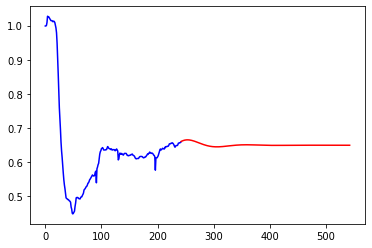

In [925]:
plt.plot(X,Y,'b')
plt.plot(X_all, Y_h, 'r')
#plt.savefig('LA_lowinc_emp')
#plt.savefig('LA_midinc_emp')
#plt.savefig('LA_highinc_emp')
#plt.savefig('Chicago_lowinc_emp')
#plt.savefig('Chicago_midinc_emp')
#plt.savefig('Chicago_highinc_emp')
#plt.savefig('Charlotte_lowinc_emp')
#plt.savefig('Charlotte_midinc_emp')
#plt.savefig('Charlotte_highinc_emp')
#plt.savefig('LA_time_at_workplace')
#plt.savefig('Chicago_time_at_workplace')
#plt.savefig('Charlotte_time_at_workplace')

In [677]:
plt.savefig('figure11')

<Figure size 432x288 with 0 Axes>

In [661]:
plt.savefig('Charlotte_timeatworkplace')

<Figure size 432x288 with 0 Axes>

In [662]:
predicted = np.array([[Y_h[100], Y_h[200], Y_h[300]]])
print(predicted)

[[0.65542073 0.65571675 0.6557492 ]]


In [663]:
#mobility = np.append(mobility, predicted, axis=0)
print(mobility)

[[0.68573314 0.68569171 0.68569148]
 [0.67085032 0.67042095 0.67041471]
 [0.65542073 0.65571675 0.6557492 ]]


In [664]:
print(mobility)

[[0.68573314 0.68569171 0.68569148]
 [0.67085032 0.67042095 0.67041471]
 [0.65542073 0.65571675 0.6557492 ]]


In [564]:
#Charlotte_pred = np.append(Charlotte_pred, predicted, axis=0)
print(Charlotte_pred)

[[0.8039138  0.8044166  0.8044198 ]
 [0.92187992 0.92077387 0.92067411]
 [0.97117636 0.96471752 0.96385897]]


In [565]:
print(Charlotte_pred)

[[0.8039138  0.8044166  0.8044198 ]
 [0.92187992 0.92077387 0.92067411]
 [0.97117636 0.96471752 0.96385897]]


In [501]:
#Chicago_pred = np.append(Chicago_pred, predicted, axis=0)
print(Chicago_pred)

[[0.         0.         0.        ]
 [0.76303671 0.79653812 0.80433019]
 [0.93218844 0.93772236 0.9374523 ]
 [0.97990234 0.97881136 0.97884061]]


In [504]:
print(Chicago_pred)

[[0.76303671 0.79653812 0.80433019]
 [0.93218844 0.93772236 0.9374523 ]
 [0.97990234 0.97881136 0.97884061]]


In [396]:
#LA_pred = np.append(LA_pred, predicted, axis=0)
print(LA_pred)

[[0.         0.         0.        ]
 [0.89022172 0.8966794  0.89126521]
 [0.93446523 0.93674871 0.93757553]]


In [409]:
print(LA_pred)

[[0.84275813 0.82629367 0.82537153]
 [0.89022172 0.8966794  0.89126521]
 [0.93446523 0.93674871 0.93757553]]


In [ ]:
'''
Cal, V6, 3,0,5, (data)
Cal, V7, 3,0,2 (data cut for 110 days)
Cal, V8, 1,0,3
'''

In [567]:
print(LA_pred)

[[0.84275813 0.82629367 0.82537153]
 [0.89022172 0.8966794  0.89126521]
 [0.93446523 0.93674871 0.93757553]]


In [568]:
print(Chicago_pred)

[[0.76303671 0.79653812 0.80433019]
 [0.93218844 0.93772236 0.9374523 ]
 [0.97990234 0.97881136 0.97884061]]


In [569]:
print(Charlotte_pred)

[[0.8039138  0.8044166  0.8044198 ]
 [0.92187992 0.92077387 0.92067411]
 [0.97117636 0.96471752 0.96385897]]
